In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Cleaning 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Feature Engineering

In [5]:
Male = pd.get_dummies(df["sex"], drop_first = True)
df = pd.concat([df,Male], axis =1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [6]:
Smoker = pd.get_dummies(df["smoker"], drop_first = True)
df = pd.concat([df,Smoker], axis =1)




In [7]:
Regions = pd.get_dummies(df["region"])
df = pd.concat([df, Regions], axis =1)

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,yes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,1,0,0


In [9]:
df = df.rename(columns={"yes": "Smoker"})
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,1,0,0


In [10]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# Expolatory Analysis

In [11]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

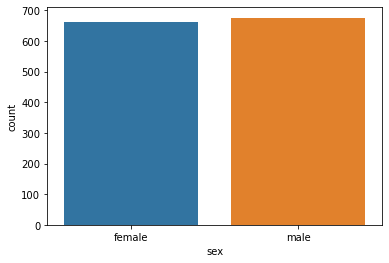

In [12]:
sns.countplot(x = "sex",data = df)

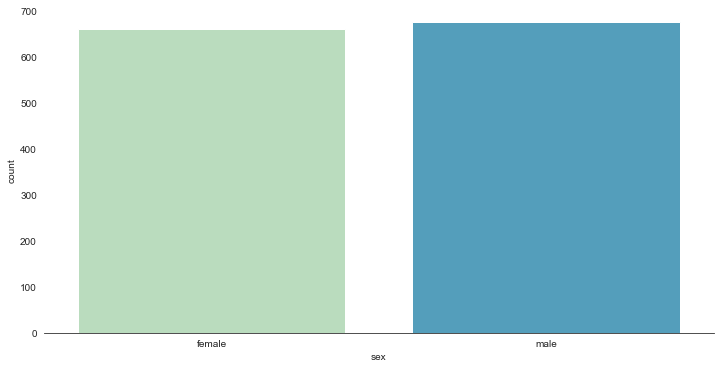

In [13]:
plt.figure(figsize=(12, 6))
sns.set_style("white")
sns.countplot(x = "sex", data = df, palette = "GnBu")
sns.despine(left = True)


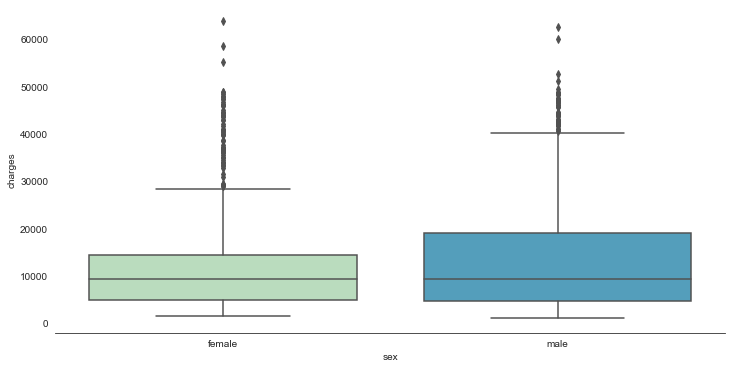

In [14]:
plt.figure(figsize=(12, 6))
sns.set_style("white")
sns.boxplot(x = "sex", y = "charges", data = df, palette = "GnBu")
sns.despine(left = True)


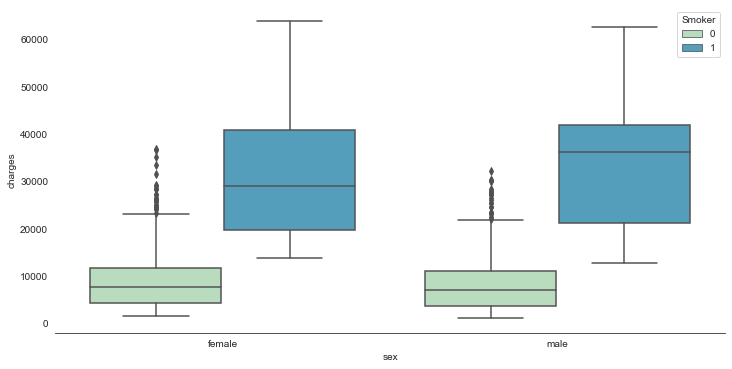

In [15]:
plt.figure(figsize=(12, 6))
sns.set_style("white")
sns.boxplot(x = "sex", y = "charges", data = df, palette = "GnBu", hue = "Smoker")
sns.despine(left = True)


<AxesSubplot:xlabel='age', ylabel='charges'>

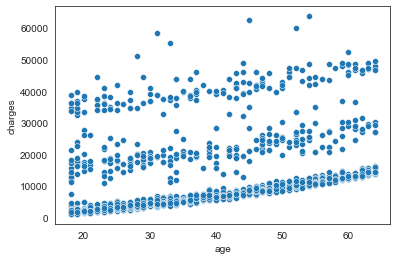

In [16]:
sns.scatterplot(x = "age", y = "charges", data = df)

<AxesSubplot:xlabel='age', ylabel='charges'>

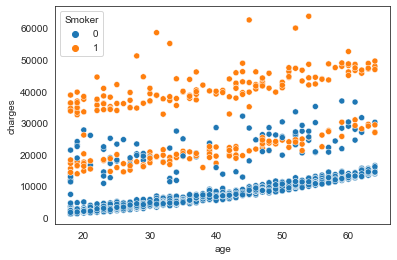

In [17]:
sns.scatterplot(x = "age", y = "charges", data = df, hue = "Smoker")

<AxesSubplot:xlabel='bmi', ylabel='charges'>

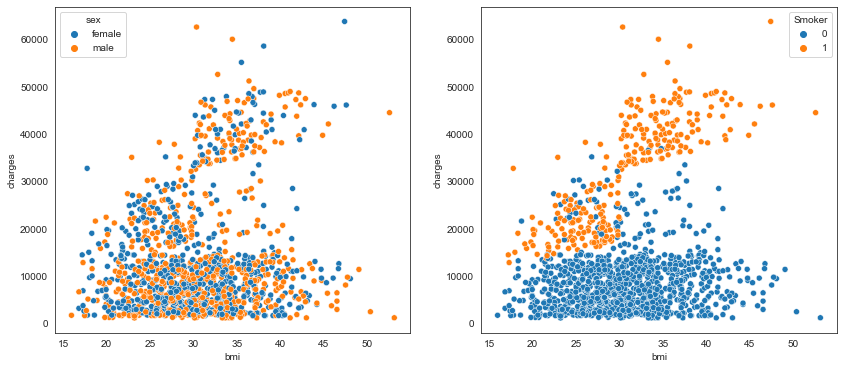

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (14,6) )

sns.scatterplot(x = "bmi", y = "charges", data = df, hue = "sex", ax = ax[0])
sns.scatterplot(x = "bmi", y = "charges", data = df, hue = "Smoker", ax = ax[1])

<AxesSubplot:>

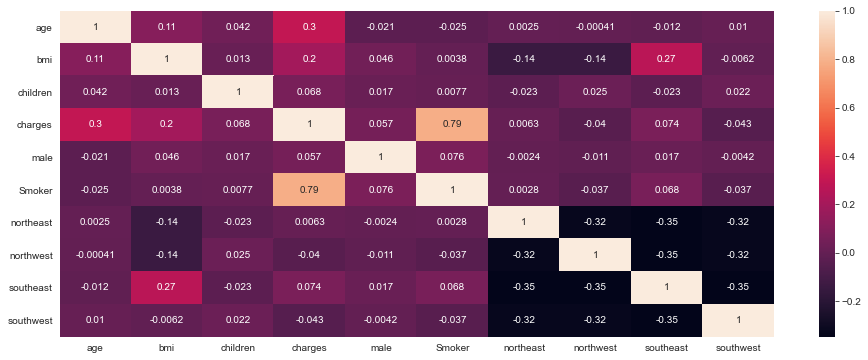

In [19]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot = True)

# Splliting Data & deleting unnecessary One

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,1,0,0


In [21]:
df.drop("sex",axis = 1, inplace = True)

In [22]:
df.drop("region", axis =1, inplace = True)

In [23]:
df.drop("smoker", axis =1, inplace = True)

In [24]:
df.head()

,age,bmi,children,charges,male,Smoker,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0


In [25]:
x = df.drop("charges", axis =1 )
y = df["charges"]

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.4)

In [27]:
x_train.shape

(802, 9)

In [28]:
x_test.shape

(536, 9)

# Scaling the Data

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
scaler_x_train = scaler.fit_transform(x_train)
scaler_x_test = scaler.fit_transform(x_test)

# Support Vector Regression Model

In [106]:
from sklearn.svm import SVR
from sklearn.svm import SVC

regressor = SVR(kernel = "linear")
regressor.fit(scaler_x_train, y_train)

SVR(kernel='linear')

In [102]:
predict = regressor.predict(scaler_x_test)

In [103]:
predict[:10]

array([10151.25376505,  9338.15881956,  8933.98309461,  9275.85228191,
        8353.4284243 ,  9538.59936588,  9179.31641397,  8618.15182228,
        8755.06809272,  8996.33718421])

In [104]:
y_test[:10]

array([22218.1149 ,  9704.66805,  5124.1887 , 34439.8559 ,  2166.732  ,
       19107.7796 , 26125.67477, 20277.80751,  6402.29135,  9101.798  ])

# Evaluation Result

In [109]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test,predict)
mse = mean_squared_error(y_test,predict)
# Printing the output
print("MAE : ", mae)
print("MSE : ", mse)
print("RMSE : ",mse**.5)

MAE :  7927.662754498739
MSE :  155000203.30788577
RMSE :  12449.907763027233
